In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from datetime import date
import nsepy as nse
import datetime as dt

sns.set()

In [9]:
slist=pd.read_excel('slist.xlsx')

In [10]:
%%time

symbol = slist['stock'][:1]

data1 = pd.DataFrame()

for x in symbol:
    data = nse.get_history(symbol=x, start=dt.date(2016,1,1), end=date.today())
    data = pd.DataFrame(data)
    data1 = pd.concat([data1,data])
print('data extracted')
data1 = data1.reset_index()

data extracted
Wall time: 2.94 s


In [12]:
data1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2016-01-01,HINDPETRO,EQ,836.20,840.0,858.20,838.70,854.00,853.85,851.74,506902,4.317465e+13,15442,149467,0.2949
1,2016-01-04,HINDPETRO,EQ,853.85,843.9,861.90,836.40,854.00,856.45,848.45,848793,7.201553e+13,25955,344817,0.4062
2,2016-01-05,HINDPETRO,EQ,856.45,856.6,861.30,842.50,859.40,856.65,850.23,1141673,9.706835e+13,37756,585079,0.5125
3,2016-01-06,HINDPETRO,EQ,856.65,853.0,885.65,853.00,881.95,881.65,876.76,1767421,1.549612e+14,42278,743139,0.4205
4,2016-01-07,HINDPETRO,EQ,881.65,879.0,888.25,852.25,857.30,858.65,870.45,1126673,9.807159e+13,35883,459449,0.4078


In [13]:
df=data1

In [17]:
number_simulation = 10
predict_day = 30

close = df['Close'].tolist()
returns = pd.DataFrame(close).pct_change()
last_price = close[-1]
results = pd.DataFrame()
avg_daily_ret = returns.mean()
variance = returns.var()
daily_vol = returns.std()
daily_drift = avg_daily_ret - (variance / 2)
drift = daily_drift - 0.5 * daily_vol ** 2

results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        shock = [drift + daily_vol * np.random.normal()]
        shock = np.mean(shock)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    results[i] = prices

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 76.31it/s]


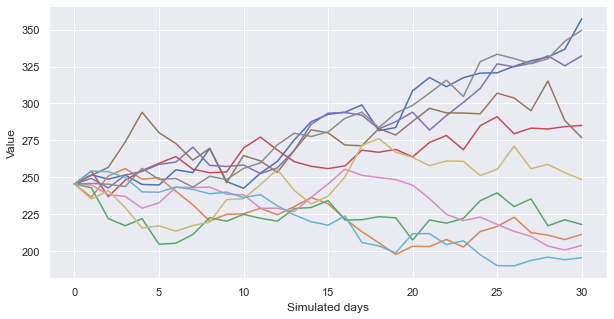

In [18]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

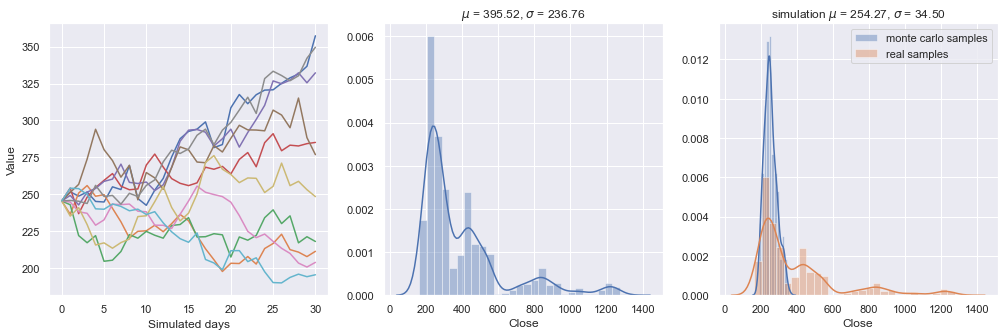

In [19]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()